## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [2]:
data = pd.read_csv("Grades.csv")
print("Dataset Loaded Successfully")
data.head()

Dataset Loaded Successfully


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


## Data Exploration

In [3]:
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (571, 43)


In [4]:
# Display the column names
print("\nColumn Names:\n", data.columns)


Column Names:
 Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [5]:
# Get basic statistics of the dataset
data_description = data.describe()
data_description

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


In [7]:
total_missing_values = missing_values.sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing_values}")


Total Missing Values in the Dataset: 425


## Distribution of CGPA

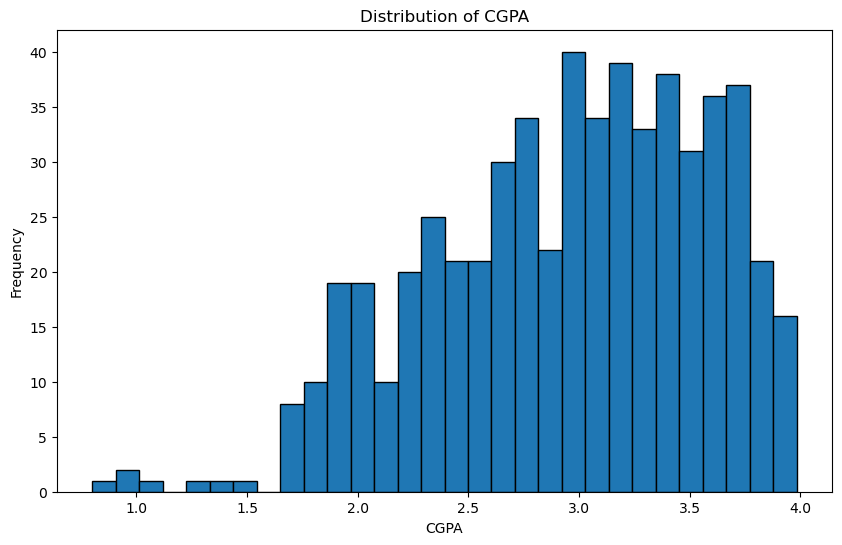

In [8]:
# Using Matplotlib for histogram
plt.figure(figsize=(10, 6))
plt.hist(data['CGPA'], bins=30, edgecolor='k')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

C:\Users\Ajupo\AppData\Local\Temp\ipykernel_15768\2739203917.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CGPA'], shade=True)
C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


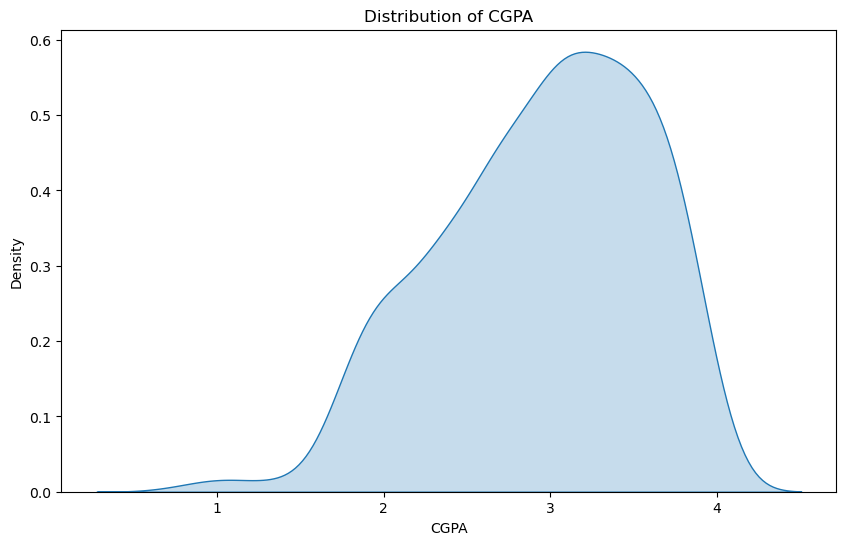

In [9]:
# Using Seaborn for density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['CGPA'], shade=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.show()

## Identify Non-Numeric Columns

In [10]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')


In [11]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

In [12]:
correlation_matrix_encoded = data_encoded.corr()

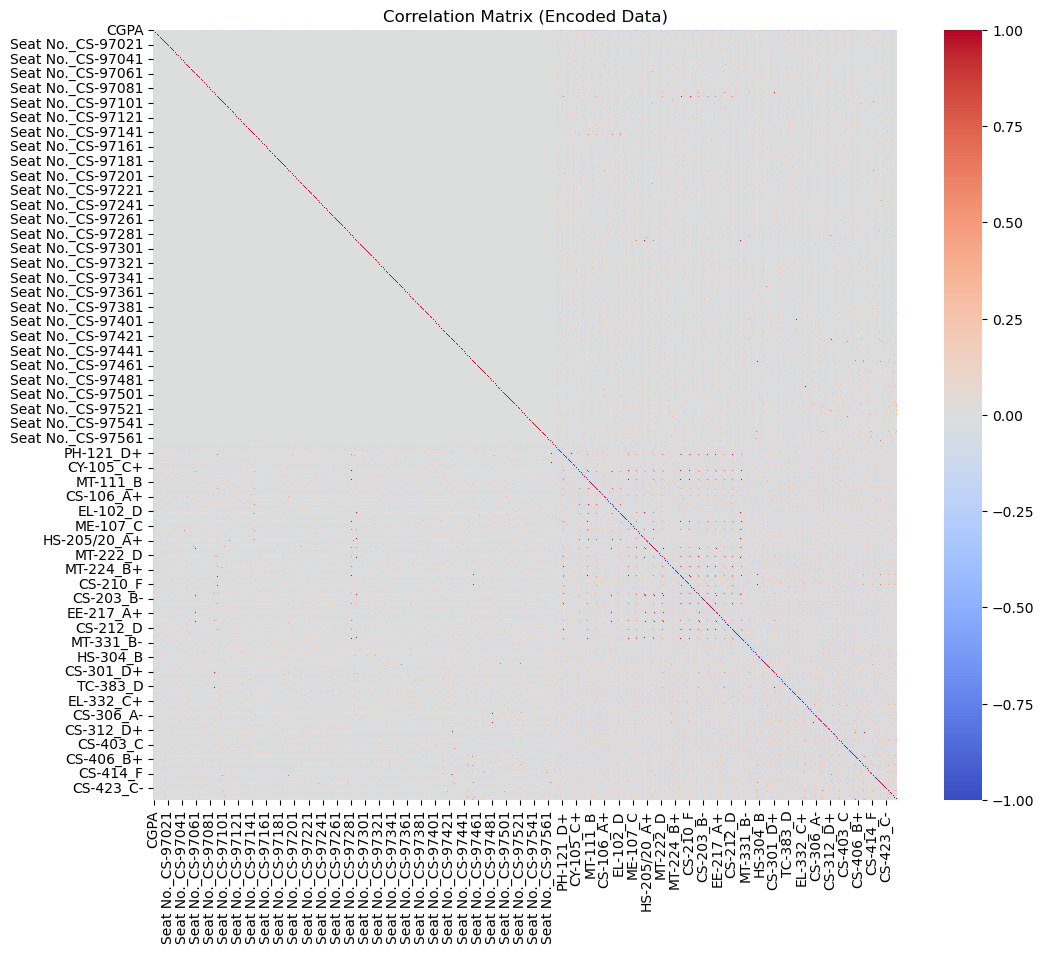

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Encoded Data)')
plt.show()

## Data Cleaning

In [14]:
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify missing values
print(data.isnull().sum())

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [15]:
print(f"Cleaned Dataset Shape: {data_encoded.shape}")

Cleaned Dataset Shape: (571, 1056)


## Data Transformation and Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_encoded.drop('CGPA', axis=1)
y = data_encoded['CGPA']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Verify the transformation
print("Feature scaling completed.")

Feature scaling completed.


In [17]:
# Calculate correlation with target variable (CGPA)
correlation_with_target = data_encoded.corr()['CGPA'].abs().sort_values(ascending=False)
print(correlation_with_target.head(20))  # Display top 20 features most correlated with CGPA

CGPA           1.000000
MT-222_D       0.402790
PH-121_D       0.390818
HS-105/12_D    0.373052
CS-215_D       0.372241
ME-107_D       0.359588
CY-105_D       0.358901
CS-306_D       0.356233
CS-301_D       0.355310
CS-107_D       0.351707
CS-212_D       0.343305
CS-419_A-      0.332255
CS-301_A-      0.331383
CS-317_A-      0.330336
MT-224_A-      0.324525
CS-210_D+      0.324459
HS-101_D       0.323958
CS-214_D+      0.321827
TC-383_D+      0.321378
MT-224_D       0.321054
Name: CGPA, dtype: float64


## Exploratory Data Analysis (EDA)

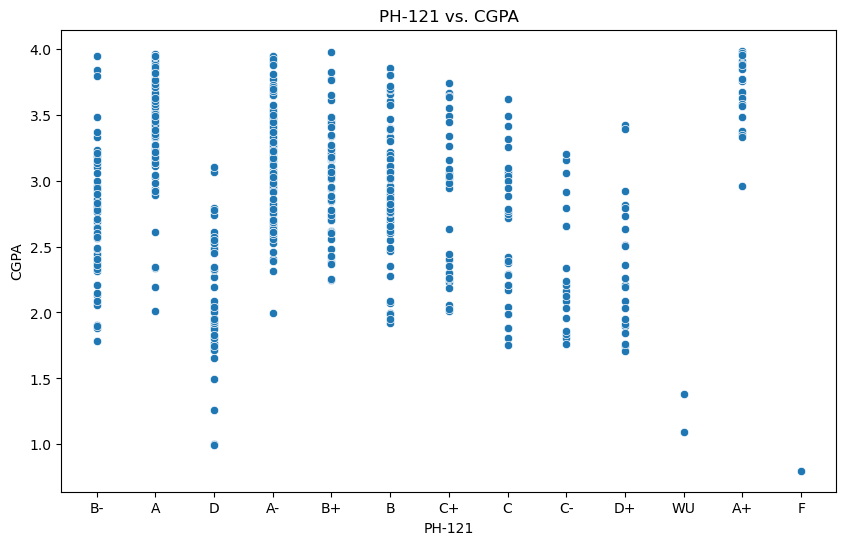

In [18]:
# Scatter plot of 'PH-121' vs. 'CGPA'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PH-121'], y=data['CGPA'])
plt.title('PH-121 vs. CGPA')
plt.xlabel('PH-121')
plt.ylabel('CGPA')
plt.show()

C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


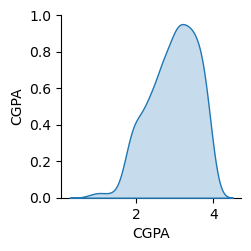

In [19]:
# Pair plot for a subset of features and CGPA
features_subset = ['PH-121', 'HS-101', 'CY-105', 'CGPA']
sns.pairplot(data[features_subset], diag_kind='kde')
plt.show()

C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


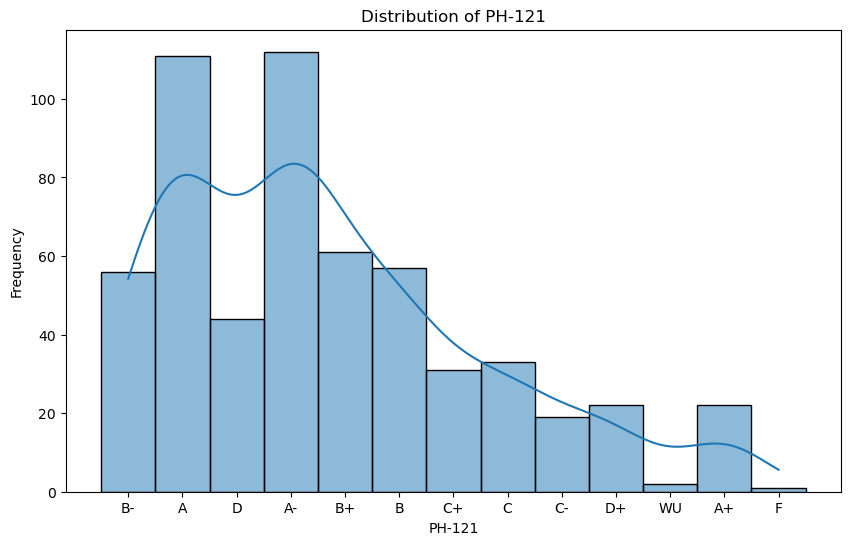

In [20]:
# Histogram for 'PH-121'
plt.figure(figsize=(10, 6))
sns.histplot(data['PH-121'], bins=30, kde=True)
plt.title('Distribution of PH-121')
plt.xlabel('PH-121')
plt.ylabel('Frequency')
plt.show()

C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


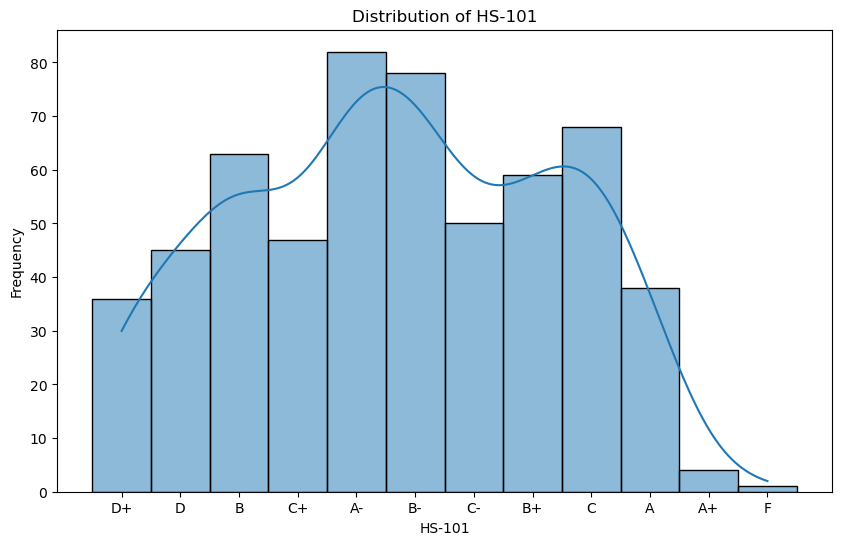

In [21]:
# Histogram for 'HS-101'
plt.figure(figsize=(10, 6))
sns.histplot(data['HS-101'], bins=30, kde=True)
plt.title('Distribution of HS-101')
plt.xlabel('HS-101')
plt.ylabel('Frequency')
plt.show()

C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


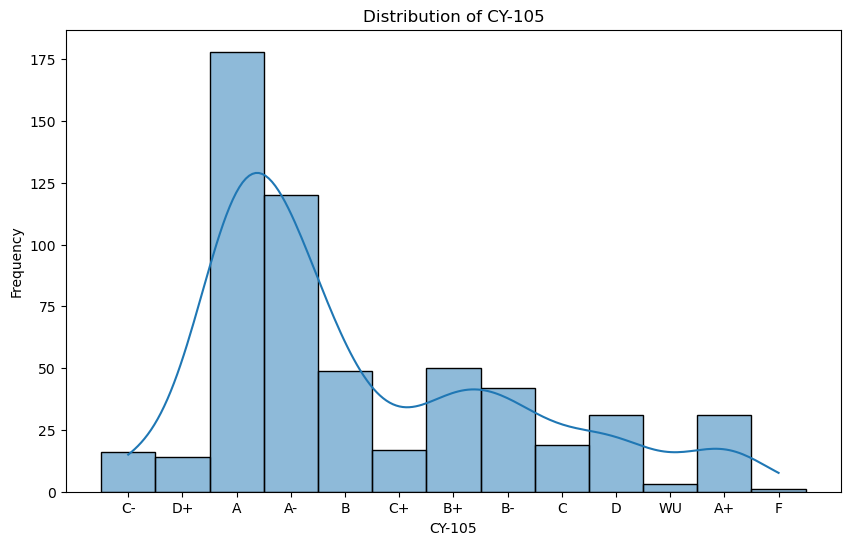

In [22]:
# Histogram for 'CY-105'
plt.figure(figsize=(10, 6))
sns.histplot(data['CY-105'], bins=30, kde=True)
plt.title('Distribution of CY-105')
plt.xlabel('CY-105')
plt.ylabel('Frequency')
plt.show()

C:\Users\Ajupo\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


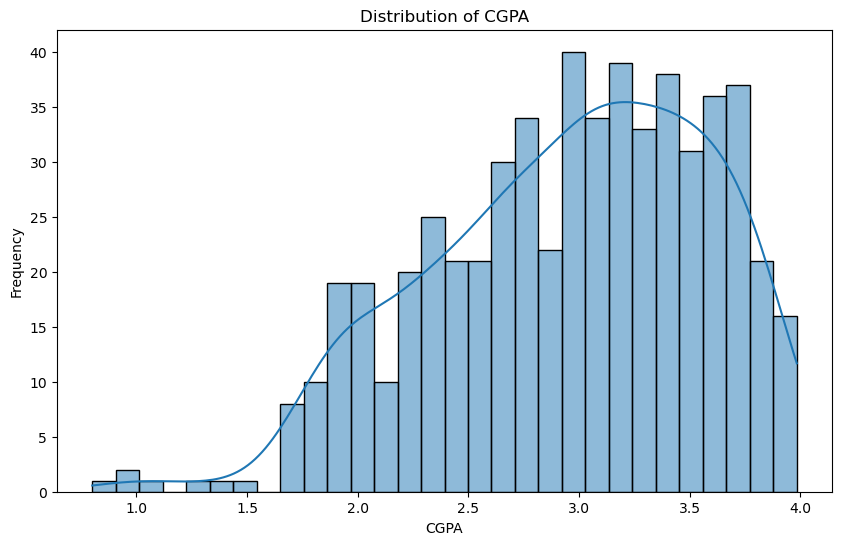

In [23]:
# Distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(data['CGPA'], bins=30, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

## Model Building

In [24]:
# Splitting the dataset into training and testing sets
X = data_encoded.drop(columns=['CGPA'])
y = data_encoded['CGPA']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting on the test set
y_pred_linear = linear_regressor.predict(X_test)

In [28]:
# Random Forest Regressor Model
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predicting on the test set
y_pred_rf = random_forest_regressor.predict(X_test)

## Model Evaluation

In [30]:
# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [31]:
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R² Score: {r2_linear}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.028292222550450136
R² Score: 0.9149841305589521


In [32]:
# Evaluate Random Forest Regressor Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [33]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 0.04636020924086951
R² Score: 0.8606912734037321


## Hyperparameter Tuning

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

In [36]:
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters from Grid Search:")
print(best_params)
print(f"Best R² Score from Grid Search: {best_score}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from Grid Search:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score from Grid Search: 0.80681004133848


In [37]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nTuned Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"R² Score: {r2_best_rf}")


Tuned Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.04596135352413033
R² Score: 0.8618898029812387


In [38]:
print("Final Model Comparison:")

print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R² Score: {r2_linear}")

print("\nTuned Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"R² Score: {r2_best_rf}")

if mse_best_rf < mse_linear and r2_best_rf > r2_linear:
    print("\nThe Random Forest model is chosen as the final model based on better performance metrics.")
else:
    print("\nThe Linear Regression model is chosen as the final model based on better performance metrics.")

Final Model Comparison:

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.028292222550450136
R² Score: 0.9149841305589521

Tuned Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.04596135352413033
R² Score: 0.8618898029812387

The Linear Regression model is chosen as the final model based on better performance metrics.


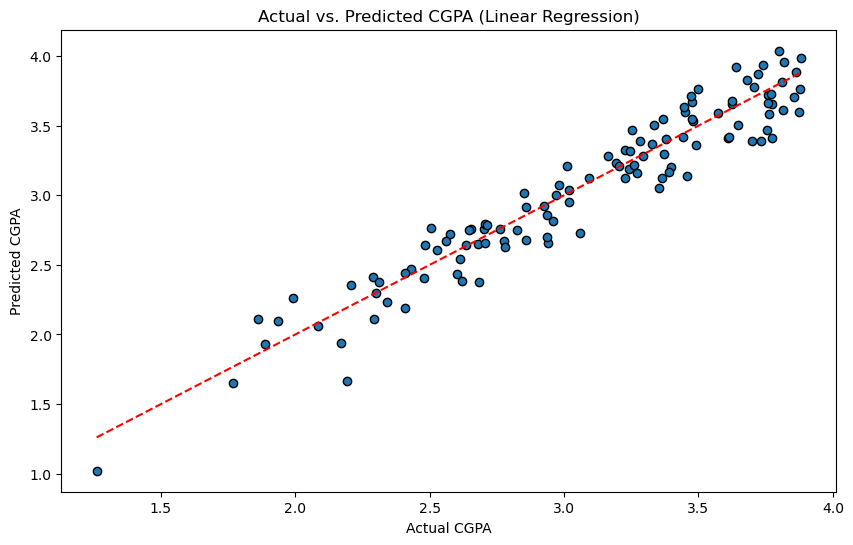

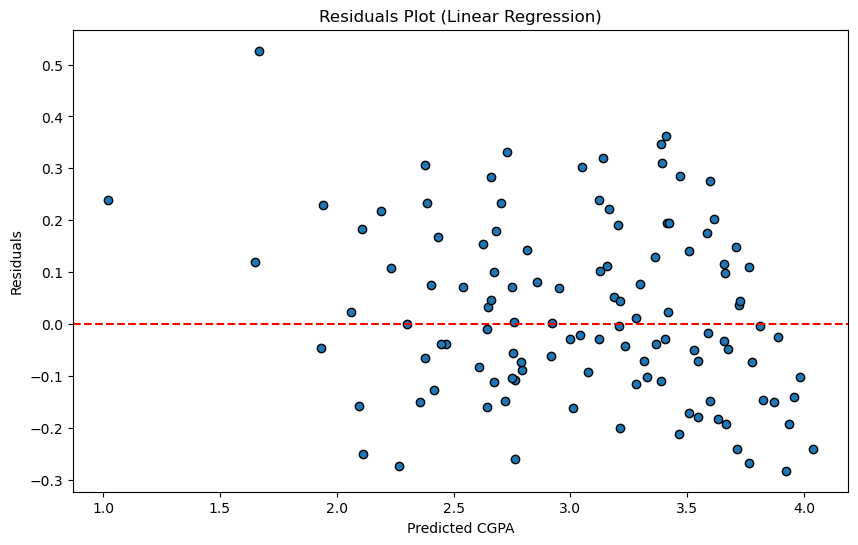

In [39]:
# Scatter plot for actual vs. predicted CGPA values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line for perfect prediction
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA (Linear Regression)')
plt.show()

# Residuals plot (errors)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CGPA')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Linear Regression)')
plt.show()

In [40]:
import joblib

model_filename = 'linear_regression_model.pkl'
joblib.dump(linear_regressor, model_filename)

['linear_regression_model.pkl']

In [42]:
# Save the scaler after training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [44]:
import joblib
import pandas as pd

# Load the saved Linear Regression model
model_filename = 'linear_regression_model.pkl'
loaded_model = joblib.load(model_filename)

# Load the saved scaler
scaler_filename = 'scaler.pkl'
scaler = joblib.load(scaler_filename)

new_data = pd.DataFrame({
    'Seat No.': ['CS-97010'],
    'PH-121': ['A'], 'HS-101': ['B+'], 'CY-105': ['B'], 'HS-105/12': ['A-'], 'MT-111': ['B'],
    'CS-105': ['B+'], 'CS-106': ['A'], 'EL-102': ['C+'], 'EE-119': ['B'], 'ME-107': ['B+'],
    'CS-107': ['A'], 'HS-205/20': ['B+'], 'MT-222': ['A'], 'EE-222': ['B-'], 'MT-224': ['A-'],
    'CS-210': ['B'], 'CS-211': ['A'], 'CS-203': ['B+'], 'CS-214': ['A-'], 'EE-217': ['B'],
    'CS-212': ['B+'], 'CS-215': ['A'], 'MT-331': ['A-'], 'EF-303': ['B+'], 'HS-304': ['B'],
    'CS-301': ['A'], 'CS-302': ['B+'], 'TC-383': ['A'], 'MT-442': ['B'], 'EL-332': ['B+'],
    'CS-318': ['A'], 'CS-306': ['B+'], 'CS-312': ['A'], 'CS-317': ['B+'], 'CS-403': ['A'],
    'CS-421': ['A-'], 'CS-406': ['B'], 'CS-414': ['A'], 'CS-419': ['B+'], 'CS-423': ['A'],
    'CS-412': ['B+']
})

new_data_encoded = pd.get_dummies(new_data)

# Reindex to ensure the new data has the same columns as the training data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_encoded)

# Make predictions with the loaded model
predictions = loaded_model.predict(new_data_scaled)

# Print the predictions
print("Predicted CGPA:", predictions)

Predicted CGPA: [4.71495573]


C:\Users\Ajupo\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
